_Universidade Federal do Rio Grande do Sul_
##### **TRABALHO 2.2**
_Programa de Pós-Graduação em Engenharia Civil/Área de Estruturas_

_PPGEC-UFRGS / PEC00025 - Introdução à Teoria de Vibrações_

**Docente:** Marcelo Maia Rocha

**Acadêmico:** _Cristian de Campos_

**Matrícula:** _00312132_
### **Análise da resposta dinâmica de uma estrutra com $n$ graus de liberdade quando exposta a um impulso**
#### Os objetivos do trabalho são:
 a) Calcular e apresentar os 4 modos de vibração;

 b) Expor a estrutura a um impacto e calcular os parâmetros $\theta i=\frac{-\pi}{2}$ e $Ui_{máx}$ para a $Vo$ no nó escolhido; 
 
 c) Plotar $U(t)$ para o grau de liberdade que recebeu o impacto;

##### **1. Importação das Bibliotecas e do Módulo MRPy**
Foram utilizadas as seguintes bibliotecas e Módulos

In [174]:
#Importação das bibliotecas base para os cálculos dessa implementação computacional
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import scipy.linalg as sc
from MRPy import MRPy


##### **2. Criação do modelo de estrutura a ser analisado**
Foi utilizado o software _AutoCad 2019_ fornecido pela _Autodesk, Inc._ para a concepção e análise visual da estrutura, com o intuito de trazer dimensões de elementos mais condizentes.
![title](3d2.png)

##### **3. Concepção no software de análise estrutural**
Utilizou-se o software _Ftool 3.01_ fornecido pela _Pontifical Catholic University of Rio de Janeiro_ para a ánalise bidimensional da estrutura, com o intuito de extrair os deslocamentos nodais a partir de cargas impostas afim de se montar a matriz de rigidez da estrutura.
Foram definidos 13 nós intermediários verticais com mais 2 horizontais ligados a cada um, com dimensões apresentadas a seguir. 
Demais dados:
Seção das barras = 20cm x 40cm
E = 25000 MPa
<img src="medidas.png" alt="Escada" width="150px"/>

##### **4. Aplicação das cargas e  obtenção dos deslocamentos**
Aplicou-se um carregamento de 10 toneladas a 180º no nó 39, e a partir disso estraiu-se os respectivos deslocamentos de todos os nós dessa direção (lateral esquerda). Este procedimento foi realizado para todos os nós analisados.

                                                     Matriz dos deslocamentos(m)
<img src="T.desl.png" alt="Escada" width="600px"/>

##### **5.  Matriz de flexibilidade**
Dividindo cada elemento dessa matriz pelo módulo da carga correspondente que foi aplicada (1000 $N$) encontra-se a _matriz de flexibilidade ($H$)_.

$\vec u=H$.$\vec F$ 

<img src="T.flexi.png" alt="Escada" width="600px"/>

##### **6.  Matriz de rigidez**
A matriz de flexibilidade é a inversa da matriz de rigidez, então para se ter acesso a matriz de rigidez da estrutura é necessário descobrir a inversa da de flexibilidade.

conhecemos que: $K.\vec u=$$\vec F$ 
$\therefore      $

$H^{-1}=K$

<img src="IK.png" alt="Escada" width="700px"/>

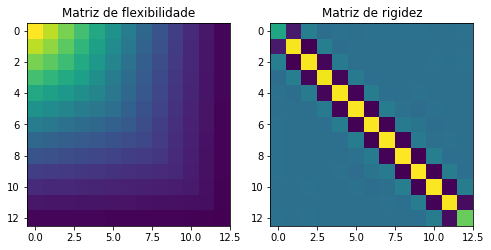

In [175]:
mf = pd.read_excel('MF.xlsx')        #Lendo o arquivo em .xlsx que contém a matriz de flexibilidade
mfp =np.array(mf)                    #Criando matriz no formato de python
K=np.linalg.inv(mfp)                 #Aplicando a inversa da matriz de flexibilidade

plt.figure(1, figsize=(8,4))
plt.subplot(1,2,1); plt.imshow(mfp); plt.title('Matriz de flexibilidade');
plt.subplot(1,2,2); plt.imshow(K); plt.title('Matriz de rigidez');

##### **6.  Análise da eficiência do processo**
Com a matriz de rigidez disponivel é possível reencotrar qualquer deslocamento da estrutura quando imposta algum carregamento, com o intuito de analisar a eficácia do processo, a matriz de rigidez será multiplicada por um vetor de cargas  F1 que corespondera a força de 10 toneladas aplicadas ao nó exposto anteriormente.

In [176]:
F1  =  np . array ([[ 100000] ,  [0] , [ 0] ,  [0] ,  [0] , [0] , [0] , [0] , [0] , [0] ,  [0] , [0] , [0]]) 
u1  =  np . linalg . solve ( K , F1 )          

print ( 'Deslocamento no topo da estrutura: {0: 6.2f} mm' . format ( 1000 * u1 [ 0 , 0 ]))

Deslocamento no topo da estrutura:  193.45 mm


O deslocamento encontrado pelo software Ftool foi de 0.1897 metros ou 189.7 mm como apresenta a primeira matriz apresentada, já a análise feita a partir da matriz de rigidez resultou em 193.45 mm o que apresenta um erro 1,97%.

##### **6.  Matriz de massa**
Para a análise no Ftool utilizou-se para a estrutura das barras, uma seção quadrada de 0,2 por 0,4 metros de concreto, considerando o peso específico do concreto é 2500 kg/m³ obtemos 200kg por unidade de comprimento das barras. Considerando o portico analisado, e agrupando a massa por nó, observamos que chegam 3 barras em cada nó com exceção do 1º o qual chegam somente duas barras, e que cada barra na vertical e horizontal possuem respectivamente 3 e 2 metros, obtemos $(1,5+1).200=500kg$ para o primeiro nó e $((1,5.2)+1).200=800kg$ por nó para os restantes. Conforme apresenta a matriz a seguir.

In [177]:
M = pd.read_excel('IM.xlsx')        #Lendo o arquivo em .xlsx que contém a matriz de massa
IM =np.array(M)                    #Criando matriz no formato de python
print (IM)

[[500   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0 800   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0 800   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0 800   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0 800   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0 800   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0 800   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0 800   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 800   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 800   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 800   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 800   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 800]]


##### **6.  Modos de vibração**

In [178]:
w21, Phi1 = sc.eig(K, IM)      #Resolvendo autovalores


iw   = w21.argsort()           #Deixando os autovalores em ordem crescente
w22  = w21[iw]
Phi1 = Phi1[:,iw]

#n_pos = w21.index(w22[0]) 

wk1  = np.sqrt(np.real(w22)) 
fk1  = wk1/2/np.pi
fmax=np.max(fk1)
print('A menor frequência fundamental da estrutura é:',fk1[0],'Hz')
print('A maior frequência referente ao ultimo G.D.L:',fmax,' Hz')


A menor frequência fundamental da estrutura é: 1.9582600436641917 Hz
A maior frequência referente ao ultimo G.D.L: 67.11325719865687  Hz


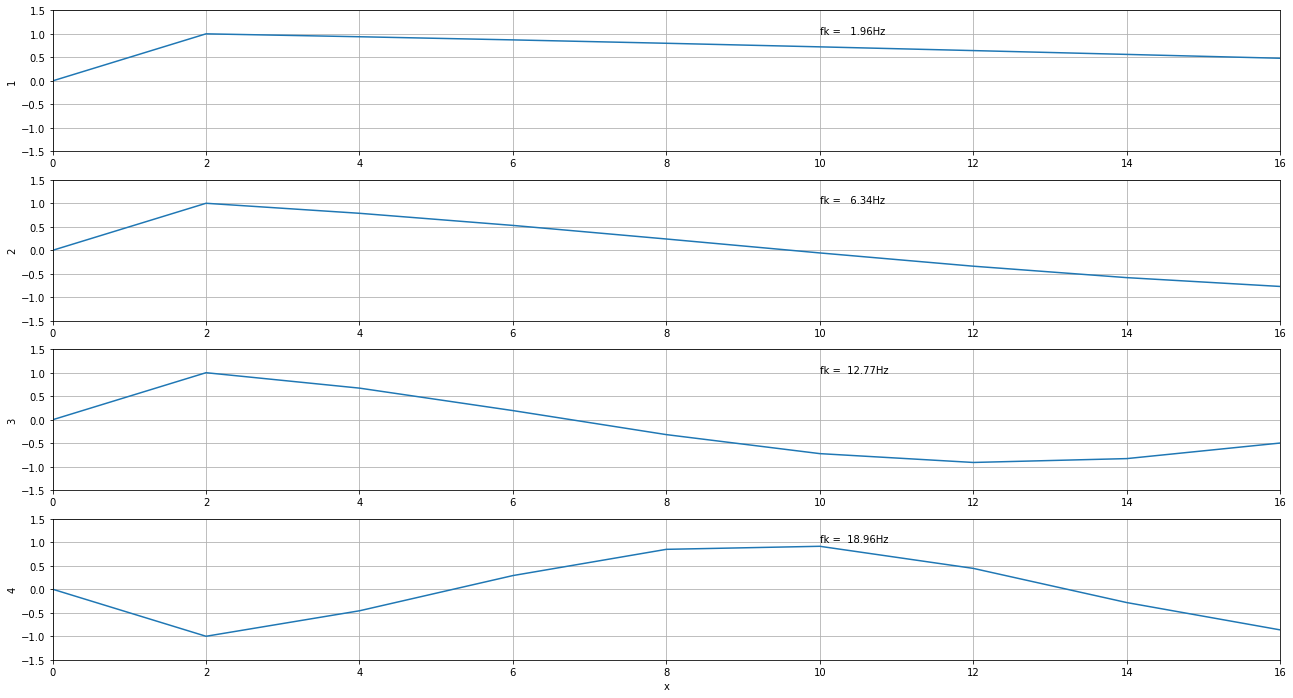

In [179]:
plt.figure(2, figsize=(22,40))
x = np.arange(0, 30, 2)

for k in range(4):
    pk = np.zeros(15)
    pk[1:-1] = Phi1[:,k]
    pk /= np.max(np.abs(pk))   # adjust scale for unity amplitude
    
    plt.subplot(13,1,k+1)
    plt.plot(x, pk)
    
    plt.xlim( 0.0, 16.0);
    plt.ylim(-1.5,  1.5);  plt.ylabel(str(k+1));
    plt.text(10, 1, 'fk = {0:6.2f}Hz'.format(fk1[k]));
    plt.grid(True)

plt.xlabel('x');

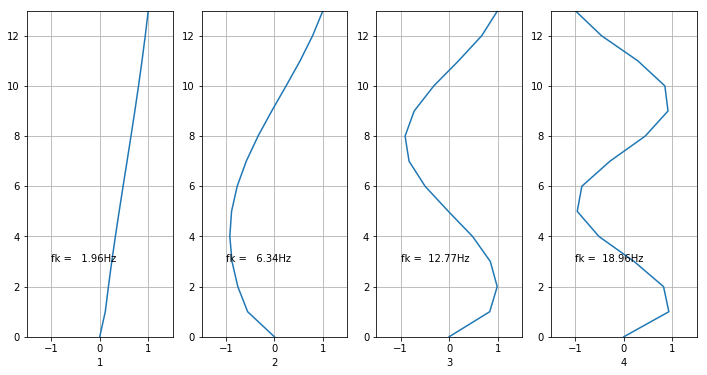

In [180]:
plt.figure(3, figsize=(12,6))
x = np.arange(14)

for k in range(4):
    pk = np.zeros(14)
    pk[1:] = Phi1[::-1,k]
    pk /= np.max(np.abs(pk))   # adjust scale for unity amplitude
    
    plt.subplot(1,4,k+1)
    plt.plot(pk, x)
    
    plt.xlim(-1.5, 1.5);  plt.xlabel(str(k+1));
    plt.ylim( 0.0, 13);
    plt.text(-1.0, 3.0, 'fk = {0:6.2f}Hz'.format(fk1[k]));
    plt.grid(True)

##### **8. Aplicação da Força impulsiva**
Expondo o sistema a um impulso, de intensidade $100KN$ em seu ponto mais desfavoravel (nó 39), com tempo de duração $Td=\frac{Tn}{4}$, considerando o periodo da maior frequência encontrada temos:

In [181]:
fmax=np.max(fk1)
FI=100000
Tn=1/fmax
td=Tn/4
m=500
vo=(FI*td)/m
print('A velocidade inicial proporcionada pelo impacto é:', vo,'m/s')
v_vo = (vo,0,0,0,0,0,0,0,0,0,0,0,0)
v_uo = np.zeros(13)

A velocidade inicial proporcionada pelo impacto é: 0.745009288582117 m/s


##### **9.Calculo de $U_{máx}$**
Considerando $\theta i=\frac{-\pi}{2}$ e $U_{0}=0$ é possível descobrir o delocamento real da estrutura, considerando as ações dinâmicas, bem como expor o deslocamento máximo, o qual evidencia a força estática equivalente.

Umax = 0.04548567928737711 m


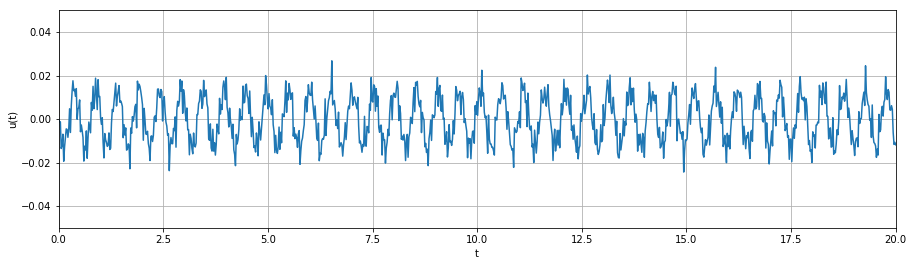

In [182]:
Phit = Phi1.transpose()   
xi = np.pi/2
UMAX = np.zeros(13)
    
for k in range (13):
    Mi = np.dot(np.dot(Phit[k], IM), Phi1[k])
    umax = (np.dot(np.dot(Phit[k], IM),v_vo)) / (wk1[k]*np.sin(xi)*Mi)
    
    UMAX[k] = umax    
t = np.linspace(0,20,1000)
uk = np.zeros((13,1000))

for k in range(13):
    
    uk[k,:] = UMAX[k]*np.cos(-wk1[k]*t - np.pi/2)
    
print('Umax =', UMAX[0],"m")    
u = np.dot(Phi1, uk)

plt.figure(2, figsize=(15,4))
plt.plot(t,u[5,:])
plt.xlim(0.0, 20.0); plt.xlabel('t');
plt.ylim(-0.05, 0.05); plt.ylabel('u(t)');
plt.grid(True)

##### **10. Calculo do coeficiente de amortecimento da estrutura $(\xi)$**

In [183]:
zeta = np.zeros(13)
zeta[0] = 0.01
zeta[1] = 0.01
alfa1 = 2*(zeta[0]*wk1[0]-zeta[1]*wk1[1])/(wk1[0]**2-wk1[1]**2)
alfa0 = 2*zeta[0]*wk1[0]-alfa1*wk1[1]**2

for k in range (11):
    zeta[k+2] = (alfa0/(2*wk1[k+2]))+(alfa1*wk1[k+2]/2)
a=0
print('Coeficientes de amortecimento por pavimento:')
for k in range(13):
    a+=1
    print('Zeta{0: 3.0f}=' .format(a),zeta[k])
print('\nOs coeficientes alfa0 e alfa1 são:\n','Alfa0=',alfa0,'\n Alfa1=',alfa1)

Coeficientes de amortecimento por pavimento:
Zeta  1= 0.01
Zeta  2= 0.01
Zeta  3= 0.013131843408735206
Zeta  4= 0.021338569524425022
Zeta  5= 0.029482044660394908
Zeta  6= 0.037751188929079735
Zeta  7= 0.04574982596660009
Zeta  8= 0.05351066336191951
Zeta  9= 0.06150147612661241
Zeta 10= 0.06800169637907047
Zeta 11= 0.07444796758420137
Zeta 12= 0.078377276407278
Zeta 13= 0.0804650187584253

Os coeficientes alfa0 e alfa1 são:
 Alfa0= -0.3623909093623362 
 Alfa1= 0.00038367362620296346
